<div dir=rtl>
پروژه سیگنال</div>

<div dir=rtl>
<b>بخش اول: تشخیص صدا</b>
</div>

<div dir=rtl>
<b>تبدیل فوریه برای تجزیه و تحلیل طیفی</b>

1. تحلیل طیفی به آنالیز طیفی فرکانس ها یا چندی‌های مرتبط مانند انرژی و ویژه‌مقدار و ویژه‌بردار گفته می‌شود.<br>
 طیف‌سنجی به شاخه‌ای از علم برمی‌گردد که نور مرئی برای مطالعات نظری در ساختار ماده و آنالیزهای کیفی و کمی استفاده می‌شد. <br>اگرچه اخیراً به عنوان یک تکنیک جدید نه فقط برای نور مرئی بلکه بسیاری از اشکال تابش‌های الکترومغناطیسی و غیرالکترومغناطیسی مانند میکروموجها، امواج رادیویی، اشعه ایکس، الکترونها، فوتونها (امواج صوتی) و غیره بکاربرده می‌شود.<br>
تحلیلگر طیف سیگنال را در حوزه فرکانس بررسی کرده و دامنهٔ هریک از فرکانس‌ها را برای آن سیگنال نشان می‌دهد.<br>منظور از طیف در این عبارت، طیف فرکانسی است. از استفاده‌های آن این است که می‌توان توان سیگنال‌هایی که مقدار آنها را در حوزه زمان می دانیم یا نمی دانیم اندازه گرفت. نوع خاصی از این دستگاه به این صورت عمل می‌کند که ابتدا سیگنال را در حوزه زمان دریافت می‌کند سپس از آن تبدیل سریع فوریه گرفته و آن را در حوزه فرکانس نشان می‌دهند.<br>
    تبدیل فوریه به عنوان پایه محاسباتی برای تجزیه و تحلیل طیفی عمل میکند. تبدیل فوریه دامنه سیگنال را از حوزه زمان به حوزه فرکانس تغییر میدهد.

</div>



<div dir=rtl>

کتابخانه های لازم را اضافه میکنیم
</div>







In [1]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np

audio_files = []
for i in range(12):
    audio_files.append("./voices/v{}.wav".format(i))



<div dir=rtl>
<b>2.1 رسم نمودار</b>

    این تابع آدرس فایل را گرفته و از نمودار power spectrum را رسم میکند
    
</div>

array([1.40156000e+05, 7.92550556e+04, 3.42326403e+05, ...,
       2.07993052e+02, 2.32353522e+02, 1.28000000e+02])

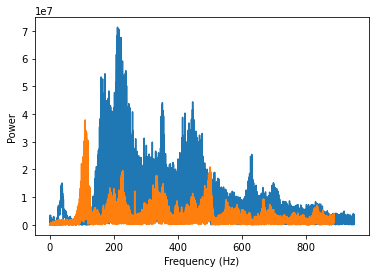

In [2]:
##! part 1: 2 -> power spectrum
def plot_power_spectrum(audio_file_path, plot=True):
    ## read audio file
    sample_freq, sound = wavfile.read(audio_file_path)
    ## choose one of channels (left)
    sound = sound[:, 0]
    ## fft
    spec = np.fft.rfft(sound)
    freq = np.fft.rfftfreq(sound.size, d=1./sample_freq)
    ## abs
    spec = np.abs(spec)
    ## add to plot
    # plot_size = len(spec) // 4
    plot_size = 20000
    if plot:
        plt.plot(freq[:plot_size], spec[:plot_size])
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Power")
    return spec

plot_power_spectrum(audio_files[0]) ## woman
plot_power_spectrum(audio_files[1]) ## man



<div dir=rtl>
<b>3.1 اوج فرکانس</b>

    
</div>

In [3]:
##! part 1: 3 -> power spectrum
def find_peak_frequency(audio_file_path):
    ## read audio file
    spec = plot_power_spectrum(audio_file_path, plot=False)
    p = np.where(spec == np.amax(spec))
    return (p[0] // 20)[0]

for audio in audio_files:
    peak_frequency = find_peak_frequency(audio)
    print("audio {} peak frequency: {} Hz".format(audio, peak_frequency))


audio ./voices/v0.wav peak frequency: 222 Hz
audio ./voices/v1.wav peak frequency: 124 Hz
audio ./voices/v2.wav peak frequency: 53 Hz
audio ./voices/v3.wav peak frequency: 127 Hz
audio ./voices/v4.wav peak frequency: 248 Hz
audio ./voices/v5.wav peak frequency: 202 Hz
audio ./voices/v6.wav peak frequency: 100 Hz
audio ./voices/v7.wav peak frequency: 188 Hz
audio ./voices/v8.wav peak frequency: 222 Hz
audio ./voices/v9.wav peak frequency: 187 Hz
audio ./voices/v10.wav peak frequency: 239 Hz
audio ./voices/v11.wav peak frequency: 131 Hz



<div dir=rtl>
<b>4.1 تشخیص صداهای فولدر</b>

</div>

In [4]:
##! part 1: 4 -> label
## audio_files: list of audio files path
def recon(audio_files):
    ## read audio files and find peaks
    peaks = []
    for audio in audio_files:
        peak = find_peak_frequency(audio)
        peaks.append(peak)

    ## find avr
    avr = np.average(peaks)
    if avr > 180 or avr < 165: avr = 172

    ## woman above average and ...
    res = []
    for i in range(len(audio_files)):
        woman = False
        if peaks[i] >= avr:
            woman = True
        res.append(woman)
        print("audio {} with peak {} Hz is {}".format(audio_files[i], peaks[i], 'women' if woman else 'men'))
    return res

recon(audio_files)


audio ./voices/v0.wav with peak 222 Hz is women
audio ./voices/v1.wav with peak 124 Hz is men
audio ./voices/v2.wav with peak 53 Hz is men
audio ./voices/v3.wav with peak 127 Hz is men
audio ./voices/v4.wav with peak 248 Hz is women
audio ./voices/v5.wav with peak 202 Hz is women
audio ./voices/v6.wav with peak 100 Hz is men
audio ./voices/v7.wav with peak 188 Hz is women
audio ./voices/v8.wav with peak 222 Hz is women
audio ./voices/v9.wav with peak 187 Hz is women
audio ./voices/v10.wav with peak 239 Hz is women
audio ./voices/v11.wav with peak 131 Hz is men


[True, False, False, False, True, True, False, True, True, True, True, False]

<div dir=rtl>
<b>بخش دوم: نویزگیری</b>
</div>

<div dir=rtl>
<b>1. الگوریتم ‫‪Spectral‬‬ ‫‪Subtraction‬‬</b>

 این یک روش ساده برای کاهش نویز سیگنال های تک کاناله میباشد که با محاسبه متوسط نویز و صدا، و تفریق آنها از یکدیگر سعی در کاهش نویز دارد.    
این روش با محاسبه spectrum به کمک تبدیل فوریه و محاسبه magnitude آن، و سپس تفریق از سیگنال اولیه، نویز را حذف میکند.

</div>

<div dir=rtl>
<b>2. پیاده سازی الگوریتم</b>

تابع spectral_subtraction با دریافت صدا و نویز و محاسبه تبدیل فوریه و سپس mean و تفریق آنها، نویز را حذف میکند و برمیگرداند

</div>

In [5]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import math
import librosa

audio_file = './Test.wav'


In [6]:
def spectral_subtraction(audio_, noise_):
    ##! find audio mean
    audio           = librosa.stft(audio_) ## short time fourier transform
    audio_mean      = np.abs(audio)
    ## for inverse transform
    audio_inverse   = np.exp(1.0j * np.angle(audio))

    ##! find noise mean
    noise           = librosa.stft(noise_) ## short time fourier transform
    noise_mean      = np.mean(np.abs(noise), axis=1)
    noise_mean      = noise_mean.reshape((noise_mean.shape[0], 1))

    ##! subtract
    result = audio_mean - noise_mean

    ##! apply phase information & inverse transform to time domain
    result = result * audio_inverse
    result = librosa.istft(result)

    return result



<div dir=rtl>
<b>2. تست الگوریتم</b>

    
ابتدا با تابع AWGN یک نویز رندوم با power تابع spectral_subtraction نویز را حذف میکنیم و برای مقادیر مختلف power، نتیجه را پلات میکنیم    

</div>

In [7]:
def awgn(signal, power):
    rang = 2
    sigpower = sum([math.pow(abs(signal[i]), 2)
                   for i in range(len(signal))]) / len(signal)
    noisepower = sigpower / (math.pow(10, power/10))
    noise = math.sqrt(noisepower) * (np.random.uniform(-rang, rang, size=len(signal)))
    return signal + noise, noise

def plott(s): plt.plot(np.linspace(0, 50, len(s)), s)
def plott2(ax, s): ax.plot(np.linspace(0, 50, len(s)), s)

##! load org audio
sound, sample_freq = librosa.load(audio_file, sr=None, mono=True)


<div dir=rtl>

برای power های مختلف نتیجه را ذخیره و پلات میکنیم
    
</div>


noisy sound    saved as: spectralSub_output/noisy_sound_0.wav
denoised sound saved as: spectralSub_output/denoise_sound_0.wav

noisy sound    saved as: spectralSub_output/noisy_sound_1.wav
denoised sound saved as: spectralSub_output/denoise_sound_1.wav

noisy sound    saved as: spectralSub_output/noisy_sound_2.wav
denoised sound saved as: spectralSub_output/denoise_sound_2.wav

noisy sound    saved as: spectralSub_output/noisy_sound_3.wav
denoised sound saved as: spectralSub_output/denoise_sound_3.wav

noisy sound    saved as: spectralSub_output/noisy_sound_4.wav
denoised sound saved as: spectralSub_output/denoise_sound_4.wav

noisy sound    saved as: spectralSub_output/noisy_sound_5.wav
denoised sound saved as: spectralSub_output/denoise_sound_5.wav

noisy sound    saved as: spectralSub_output/noisy_sound_6.wav
denoised sound saved as: spectralSub_output/denoise_sound_6.wav

noisy sound    saved as: spectralSub_output/noisy_sound_7.wav
denoised sound saved as: spectralSub_output/deno

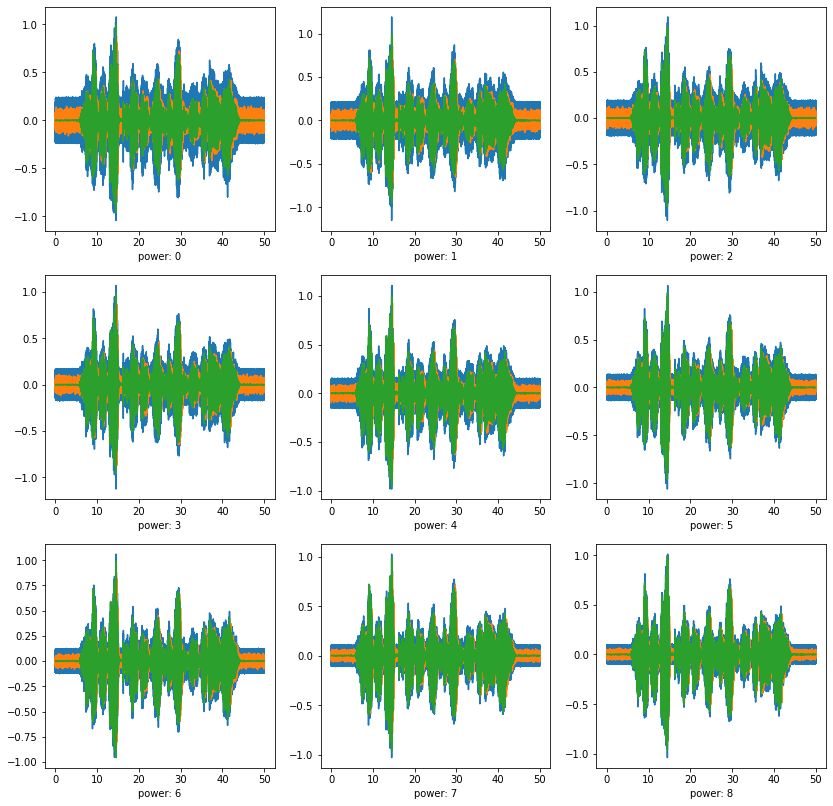

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(14, 14))
for axi, power in zip(ax.flat, range(0, 9)):
    ##! add noise with awgn and power
    noisy_sound, noise = awgn(sound, power)

    ##! spectral_subtraction
    denoised_sound = spectral_subtraction(noisy_sound, noise)

    ## save output & plot
    wavfile.write("spectralSub_output/noisy_sound_{}.wav".format(power), sample_freq, noisy_sound)
    wavfile.write("spectralSub_output/denoise_sound_{}.wav".format(power), sample_freq, denoised_sound)
    print("\nnoisy sound    saved as: spectralSub_output/noisy_sound_{}.wav".format(power))
    print("denoised sound saved as: spectralSub_output/denoise_sound_{}.wav".format(power))
    plott2(axi, noisy_sound) ## blue
    plott2(axi, denoised_sound) ## orange
    plott2(axi, sound) ## green
    axi.set_xlabel('power: ' + str(power))



<div dir=rtl>

بخش آبی صدا به همراه نویز است و بخش سبز صدای اصلی بدون نویز و نارنجی صدای خروجی پس از تفریق طیفی است.<br>
معیار کارایی الگوریتم، تبدیل آبی به نارنجی به طوری که به سبز نردیک تر باشد است.<br>
اگر بر روی بخش های صدای اصلی که مکث میشود دقت کنیم(قعر ها)، متوجه میشویم تاثیر نویز بر این قسمت ها بیشتر است.
همچنین تاثیر الگوریتم<br> spectral_subtraction نیز بر این نقاط بیشتر است و به همین دلیل با گوش دادن به فایل های خروجی، قبل و بعد از کاهش نویز متوجه تاثیر زیاد این الگوریتم میشویم.<br>
مثلا برای power 0 فایل نویزدار تقریبا نامفهوم است ولی بعد از حذف نویز میتوان حرف های گوینده را تشخیص داد.<br><br>همچنین با مقایسه قدرت های مختلف نویزی، مشاهده میکنیم الگوریتم سعی میکند نسبت کاهش نویز به صدا را رعایت کند. یعنی هرچه نویز قدرت بیشتری داشته باشد، تفریق طیفی نیز تاثیر بیشتری روی صدای نویز دار دارد و در نتیجه میتوان تاثیر حذف نویز در قدرت های بالا (power 0 مثلا) را مشاهده کرد.

    
    

</div>